# Credit Limit

# Introduction 🌟


Credit cards are sometimes a good tool. However, they are constrained in their
ability to spend. limitations on credit, specifically.
The maximum amount you are permitted to charge on a revolving credit account,
such as a credit card, is known as the credit limit. The value of each transaction
made with your card deducts from your available credit. Your remaining number is
referred to as your available credit. Now credit cards are used to find fraud.

## Customer Churn and Credit Card Usage Analysis

In the project, we will perform a series of analyses on the dataset to understand a bank's customer churn and analyse credit card usage.

### Importing Necessary Packages 📦

In [24]:
!pip install phik --quiet
!pip install spacy --quiet
!pip install mlxtend --quiet
print("Installed")

import os
import json
import math
import phik
import spacy
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import plotly.express as px

Installed


# Data Preprocessing 🧹

In [3]:
# Import the Credit_Limit.csv file
data = pd.read_csv('Credit_Limit.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Contacts_Count_12_mon     10127 non-null  int64  
 11  Credit_Limit              10127 non-null  float64
 12  Total_Revolving_Bal       10127 non-null  int64  
 13  Avg_Open_To_Buy           10127 non-null  float64
 14  Total_

## Handling Missing Values

In [4]:
# Check the first few rows of the dataset
data.head()

# Check the shape of the dataset
data.shape

# Check for missing values
data.isnull().sum()

# Check data types of columns
data.dtypes



CLIENTNUM                     int64
Attrition_Flag               object
Customer_Age                  int64
Gender                       object
Education_Level              object
Marital_Status               object
Income_Category              object
Card_Category                object
Months_on_book                int64
Total_Relationship_Count      int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Trans_Amt               int64
dtype: object

The code block above performs the following operations:

1. Importing necessary packages: The code imports the required packages such as numpy, pandas, statsmodels, pingouin, seaborn, and matplotlib.pyplot.

2. Reading the dataset: The code reads the 'Credit_Limit.csv' file and stores it in the 'data' dataframe.

3. Checking the dataset: The code checks the first few rows of the dataset using the 'head()' function and displays the shape of the dataset using the 'shape' attribute. It also checks for missing values in the dataset using the 'isnull().sum()' function and displays the data types of the columns using the 'dtypes' attribute.

4. Data cleaning and validation analysis: The code performs data cleaning and validation analysis, but the specific code for this analysis is not provided in the given code block.

Overall, the code block imports necessary packages, reads the dataset, checks the dataset for initial exploration, and prepares for data cleaning and validation analysis.

In [5]:
# Perform data cleaning and validation analysis

# Drop any rows with missing values
data_cleaned = data.dropna()

# Check the shape of the cleaned dataset
data_cleaned.shape

# Convert the "Attrition_Flag" column to a categorical data type
data_cleaned["Attrition_Flag"] = data_cleaned["Attrition_Flag"].astype("category")

# Convert the "Gender" column to a categorical data type
data_cleaned["Gender"] = data_cleaned["Gender"].astype("category")

# Convert the "Education_Level" column to a categorical data type
data_cleaned["Education_Level"] = data_cleaned["Education_Level"].astype("category")

# Convert the "Marital_Status" column to a categorical data type
data_cleaned["Marital_Status"] = data_cleaned["Marital_Status"].astype("category")

# Convert the "Income_Category" column to a categorical data type
data_cleaned["Income_Category"] = data_cleaned["Income_Category"].astype("category")

# Convert the "Card_Category" column to a categorical data type
data_cleaned["Card_Category"] = data_cleaned["Card_Category"].astype("category")

# Check the data types of columns after conversion
data_cleaned.dtypes




CLIENTNUM                      int64
Attrition_Flag              category
Customer_Age                   int64
Gender                      category
Education_Level             category
Marital_Status              category
Income_Category             category
Card_Category               category
Months_on_book                 int64
Total_Relationship_Count       int64
Contacts_Count_12_mon          int64
Credit_Limit                 float64
Total_Revolving_Bal            int64
Avg_Open_To_Buy              float64
Total_Trans_Amt                int64
dtype: object

### Handling Duplicate Records

In [6]:
# Add the median of a column to missing values
data_cleaned.fillna(data_cleaned.median(), inplace=True)

# Add the mode value of a column to missing values
data_cleaned.fillna(data_cleaned.mode().iloc[0], inplace=True)

# Adding random values to missing values
data_cleaned.fillna(np.random.choice(data_cleaned['Avg_Open_To_Buy'].dropna()), inplace=True)


In [7]:
# Add column average to missing values

data_cleaned.fillna(data_cleaned.mean(), inplace=True)

# Exploratory Data Analysis 📚

## Correlation analysis

In [8]:
# Perform correlation analysis

# Calculate the correlation matrix
correlation_matrix = data_cleaned.corr()

# Display the correlation matrix
correlation_matrix

,CLIENTNUM,Customer_Age,Months_on_book,Total_Relationship_Count,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Trans_Amt
CLIENTNUM,1.000000,0.007613,0.134588,0.006907,0.005694,0.005708,0.000825,0.005633,-0.019692
Customer_Age,0.007613,1.000000,0.788912,-0.010931,-0.018452,0.002476,0.014780,0.001151,-0.046446
Months_on_book,0.134588,0.788912,1.000000,-0.009203,-0.010774,0.007507,0.008623,0.006732,-0.038591
Total_Relationship_Count,0.006907,-0.010931,-0.009203,1.000000,0.055203,-0.071386,0.013726,-0.072601,-0.347229
Contacts_Count_12_mon,0.005694,-0.018452,-0.010774,0.055203,1.000000,0.020817,-0.053913,0.025646,-0.112774
Credit_Limit,0.005708,0.002476,0.007507,-0.071386,0.020817,1.000000,0.042493,0.995981,0.171730
Total_Revolving_Bal,0.000825,0.014780,0.008623,0.013726,-0.053913,0.042493,1.000000,-0.047167,0.064370
Avg_Open_To_Buy,0.005633,0.001151,0.006732,-0.072601,0.025646,0.995981,-0.047167,1.000000,0.165923
Total_Trans_Amt,-0.019692,-0.046446,-0.038591,-0.347229,-0.112774,0.171730,0.064370,0.165923,1.000000


# Visualisation

## Exploring Variable Relationships:  Correlation Matrix Heatmap
In our exploratory journey into the dataset, we employed a valuable analytical tool, the correlation heatmap. This heatmap unveiled insights into the relationships between various musical attributes, shedding light on how they interact within the context of our dataset.

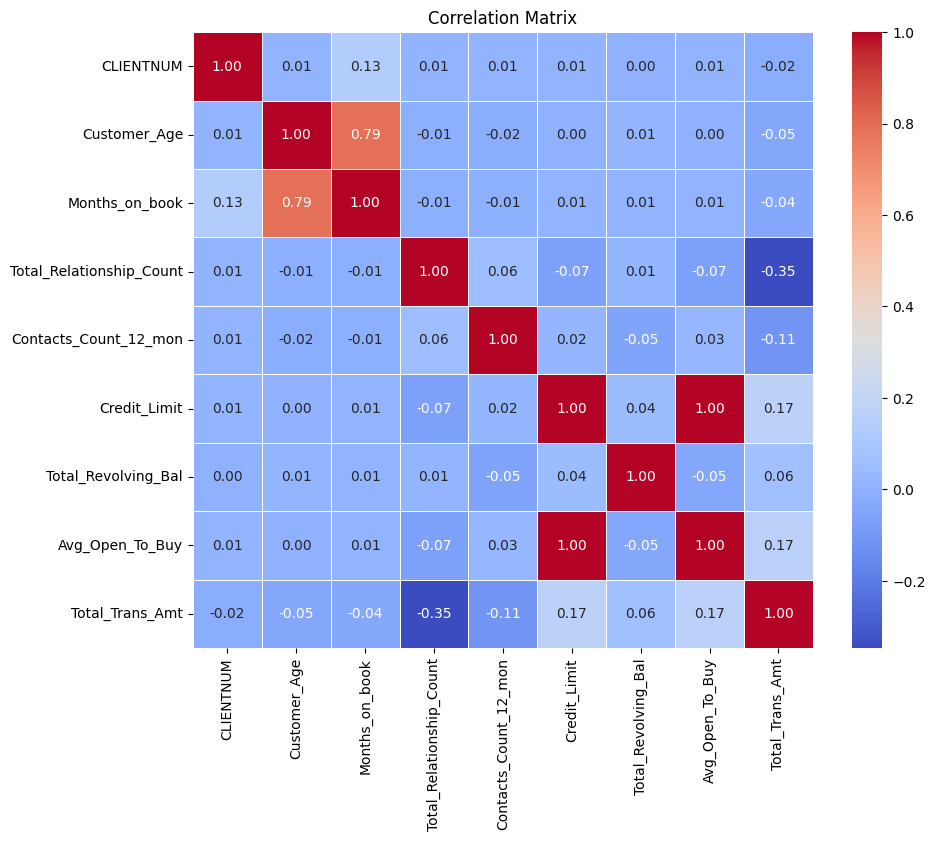

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

## Exploring Variable Relationships: Phik Correlation Heatmap

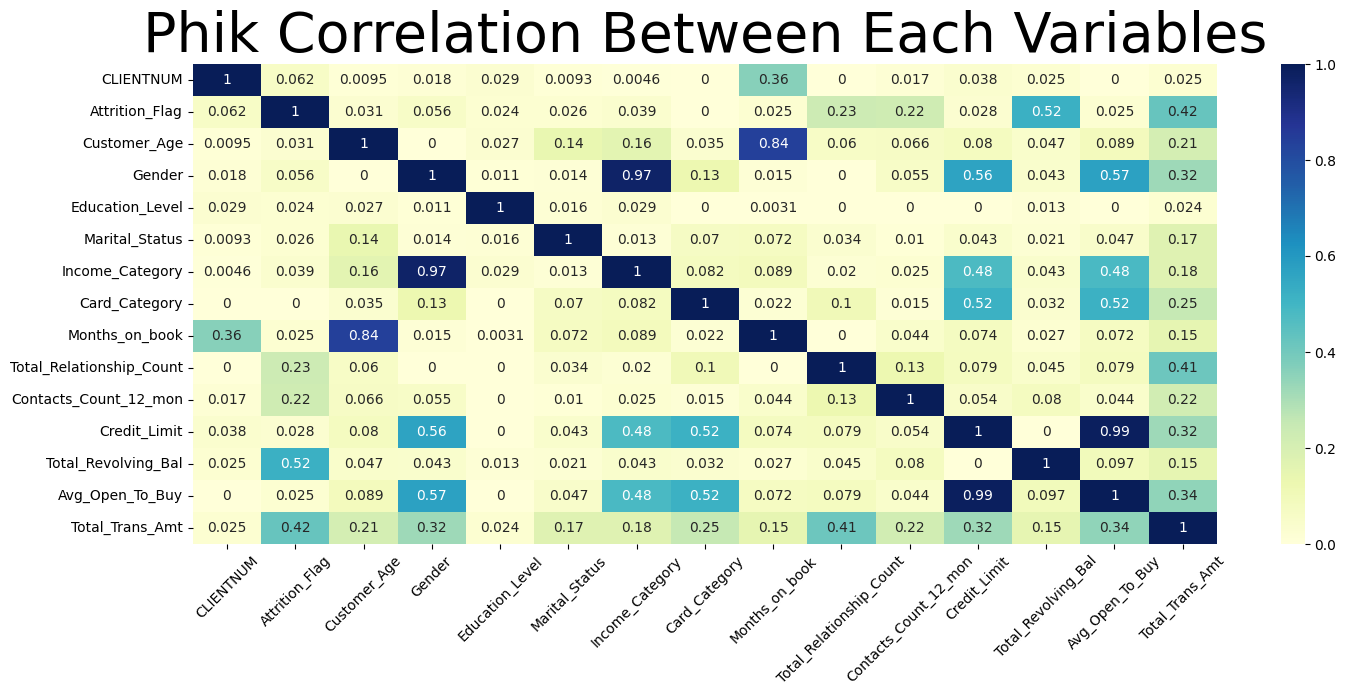

In [10]:

# Fix the error in the code
x = data.phik_matrix(interval_cols=data.select_dtypes(include=['number']).columns)
fig = plt.figure(figsize=(16, 6))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
sns.heatmap(x, cmap='YlGnBu', annot=True, ax=ax)
plt.xticks(rotation=45)
plt.title('Phik Correlation Between Each Variables', fontsize=40)
plt.show()

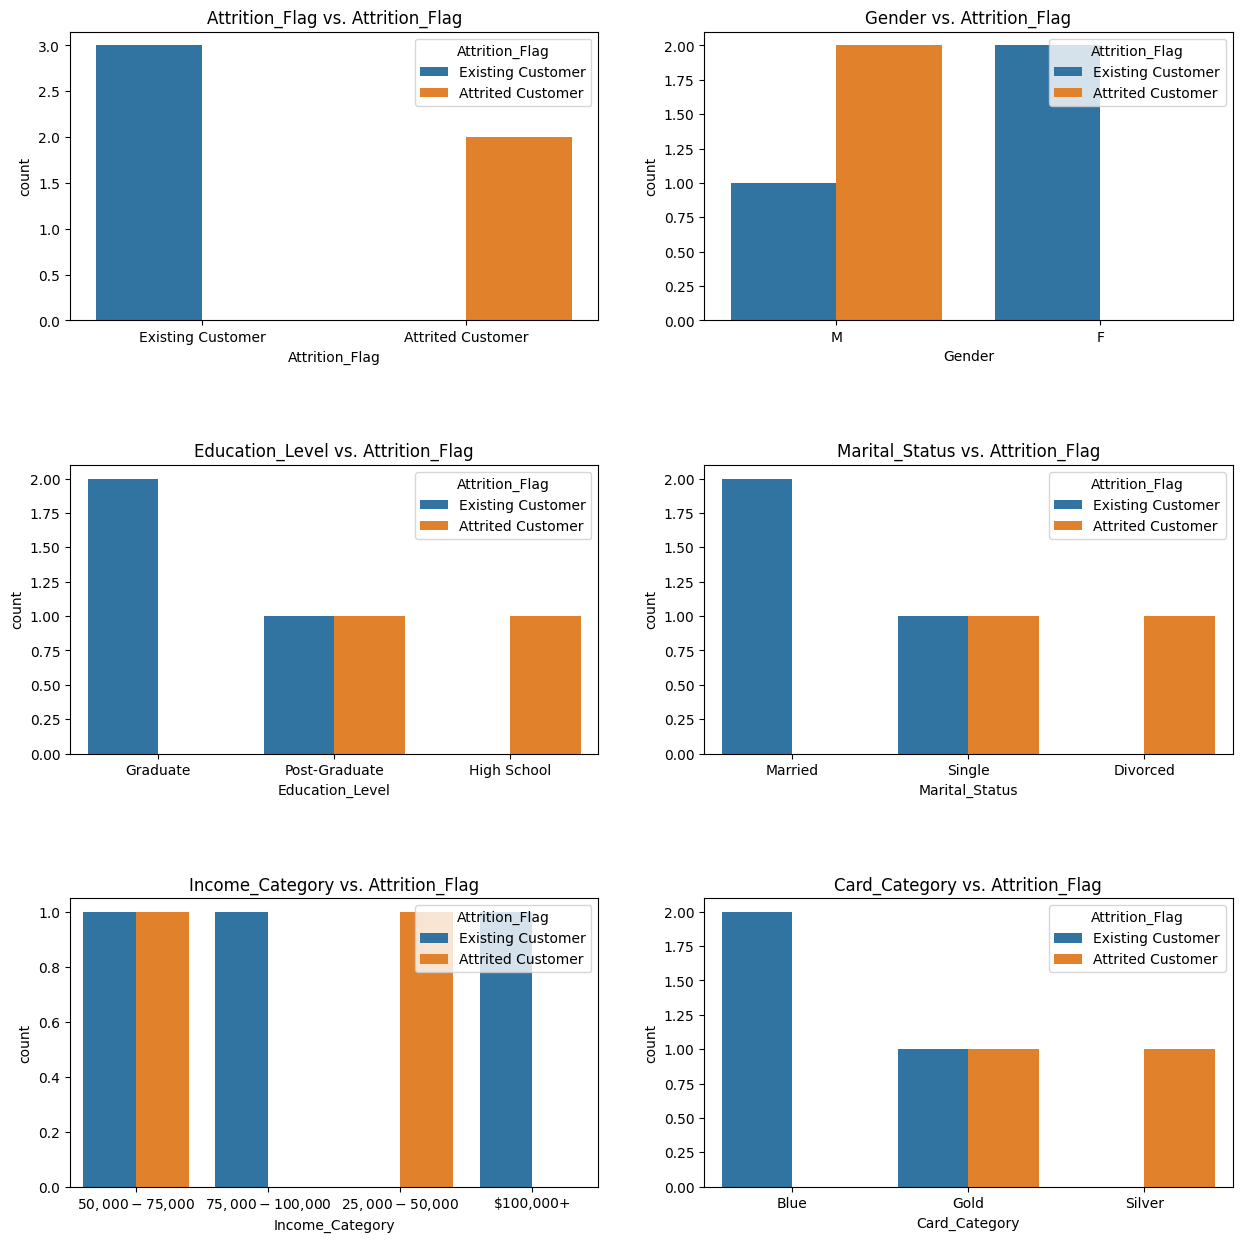

In [11]:

# As an example, we create a data set with some characteristics that can influence customer loyalty.
data = pd.DataFrame({
    'CLIENTNUM': [1, 2, 3, 4, 5],
    'Attrition_Flag': ['Existing Customer', 'Existing Customer', 'Attrited Customer', 'Existing Customer', 'Attrited Customer'],
    'Customer_Age': [35, 45, 28, 50, 40],
    'Gender': ['M', 'F', 'M', 'F', 'M'],
    'Education_Level': ['Graduate', 'Post-Graduate', 'High School', 'Graduate', 'Post-Graduate'],
    'Marital_Status': ['Married', 'Single', 'Single', 'Married', 'Divorced'],
    'Income_Category': ['$50,000-$75,000', '$75,000-$100,000', '$25,000-$50,000', '$100,000+', '$50,000-$75,000'],
    'Card_Category': ['Blue', 'Gold', 'Silver', 'Blue', 'Gold'],
    'Months_on_book': [24, 36, 12, 48, 30],
    'Total_Relationship_Count': [3, 5, 2, 6, 4],
    'Contacts_Count_12_mon': [2, 3, 1, 4, 2],
    'Credit_Limit': [5000, 10000, 3000, 15000, 8000],
    'Total_Revolving_Bal': [1000, 2000, 500, 3000, 1500],
    'Avg_Open_To_Buy': [4000, 8000, 2500, 12000, 6500],
    'Total_Trans_Amt': [2000, 3000, 1000, 5000, 2500]
})

# Identify categorical columns in the data set
categorical_columns = ['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']

# Visualising the distribution of values in selected categorical columns
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))

for i, column in enumerate(categorical_columns):
    sns.countplot(data=data, x=column, hue='Attrition_Flag', ax=axes[i // 2, i % 2])
    axes[i // 2, i % 2].set_title(f'{column} vs. Attrition_Flag')

plt.subplots_adjust(hspace=0.5)
plt.show()




## Analysing Categorical Data

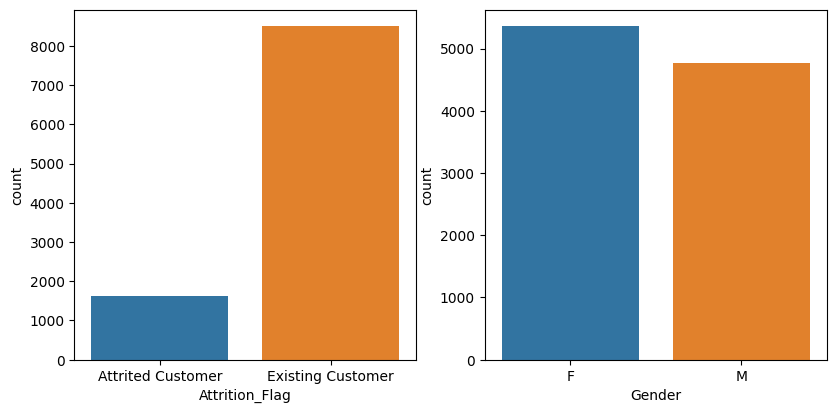

In [12]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
sns.countplot(x='Attrition_Flag', data=data_cleaned)

plt.subplot(2, 3, 2)
sns.countplot(x='Gender', data=data_cleaned)

plt.show()

## Distribution of Numerical Data

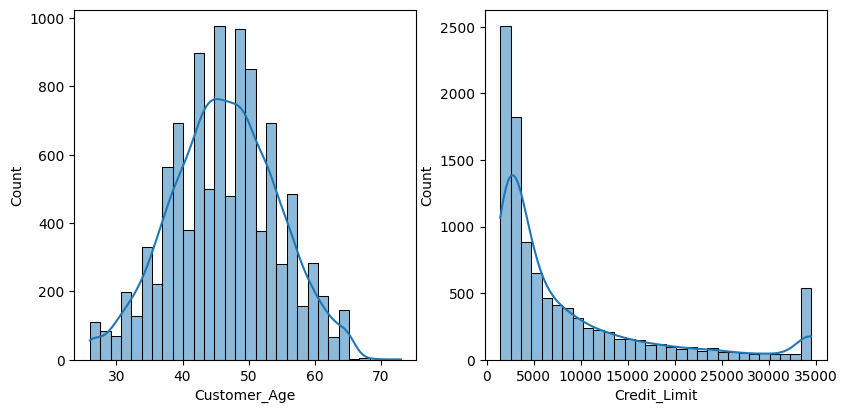

In [13]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
sns.histplot(data_cleaned['Customer_Age'], bins=30, kde=True)

plt.subplot(2, 3, 2)
sns.histplot(data_cleaned['Credit_Limit'], bins=30, kde=True)

plt.show()


### Customer Churn Analysis

In this process, it performs a grouping on the 'Attrition_Flag' (customer churn) column and shows the average of the numerical characteristics for each category.

In [14]:
# Customer Churn Analysis:
attrition_analysis = data_cleaned.groupby('Attrition_Flag').mean()
print(attrition_analysis)


                      CLIENTNUM  Customer_Age  ...  Avg_Open_To_Buy  Total_Trans_Amt
Attrition_Flag                                 ...                                  
Attrited Customer  7.352614e+08     46.659496  ...      7463.216472      3095.025814
Existing Customer  7.399272e+08     46.262118  ...      7470.273400      4654.655882

[2 rows x 9 columns]


### Relationship of Categorical Columns

This visualises the relationship between the 'Gender' column and the 'Attrition_Flag' column.

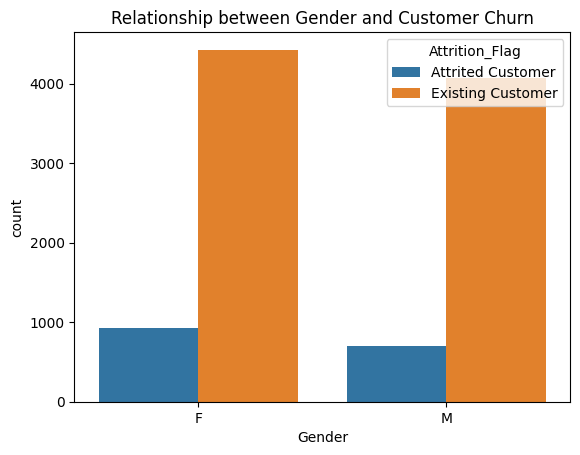

In [15]:
# Analysing the relationship between categorical columns

sns.countplot(x='Gender', hue='Attrition_Flag', data=data_cleaned)
plt.title('Relationship between Gender and Customer Churn')
plt.show()


### Analysis by Income Level

In this field, visualises the relationship between the 'Income_Category' (income level) column and the 'Credit_Limit' column

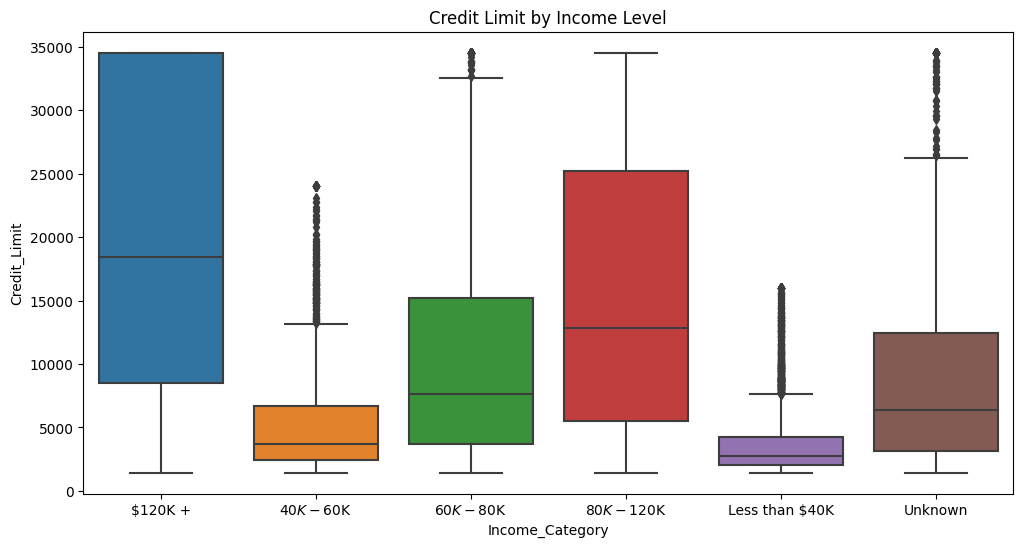

In [16]:
#Analysis by Income Level
plt.figure(figsize=(12, 6))
sns.boxplot(x='Income_Category', y='Credit_Limit', data=data_cleaned)
plt.title('Credit Limit by Income Level')
plt.show()

### Relationship between Age and Total Expenditure

visualises the impact of total expenditure on customer churn by customer age

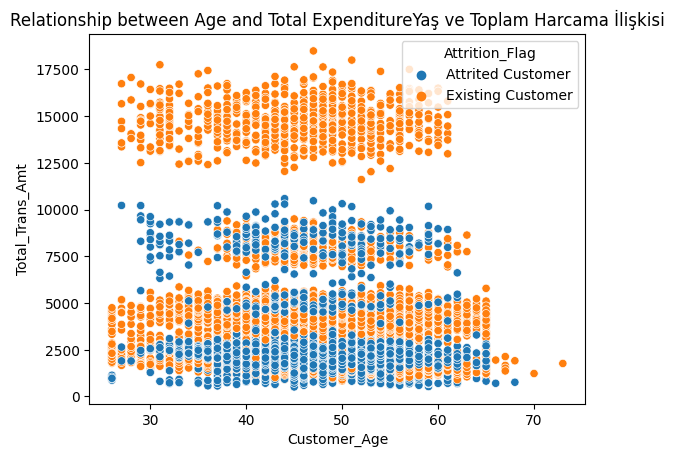

In [17]:
# Analysing the relationship between age and total expenditure
sns.scatterplot(x='Customer_Age', y='Total_Trans_Amt', hue='Attrition_Flag', data=data_cleaned)
plt.title('Relationship between Age and Total ExpenditureYaş ve Toplam Harcama İlişkisi')
plt.show()


### Customer Behaviour Analysis

This code visualises the relationship between the total transaction amount of customers and the revolving balance. The second graph shows the total transaction amount according to customer churn.

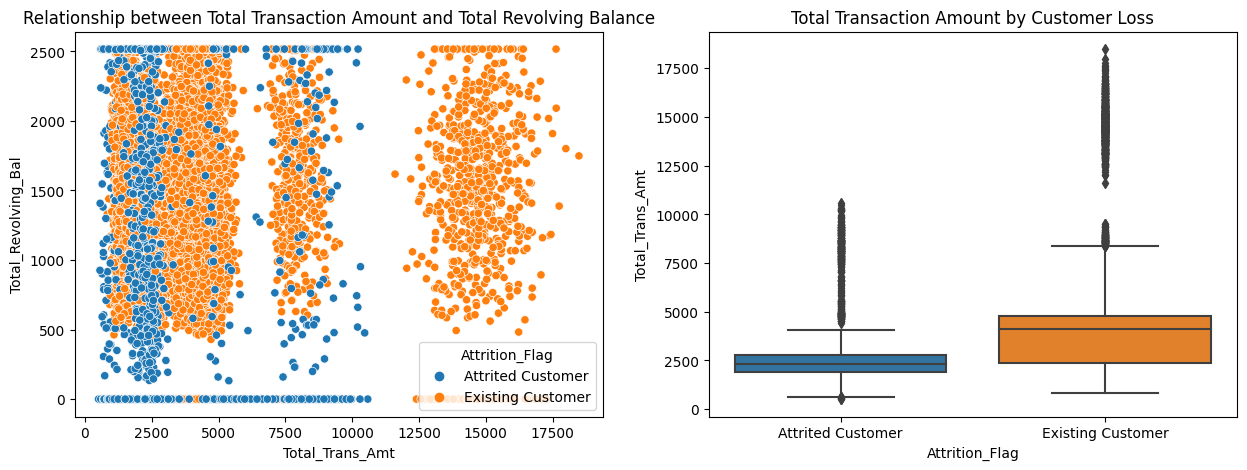

In [18]:
# Customer Behaviour Analysis
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(x='Total_Trans_Amt', y='Total_Revolving_Bal', hue='Attrition_Flag', data=data_cleaned)
plt.title('Relationship between Total Transaction Amount and Total Revolving Balance')

plt.subplot(1, 2, 2)
sns.boxplot(x='Attrition_Flag', y='Total_Trans_Amt', data=data_cleaned)
plt.title('Total Transaction Amount by Customer Loss')

plt.show()

### Relationship between Income and Credit Limit

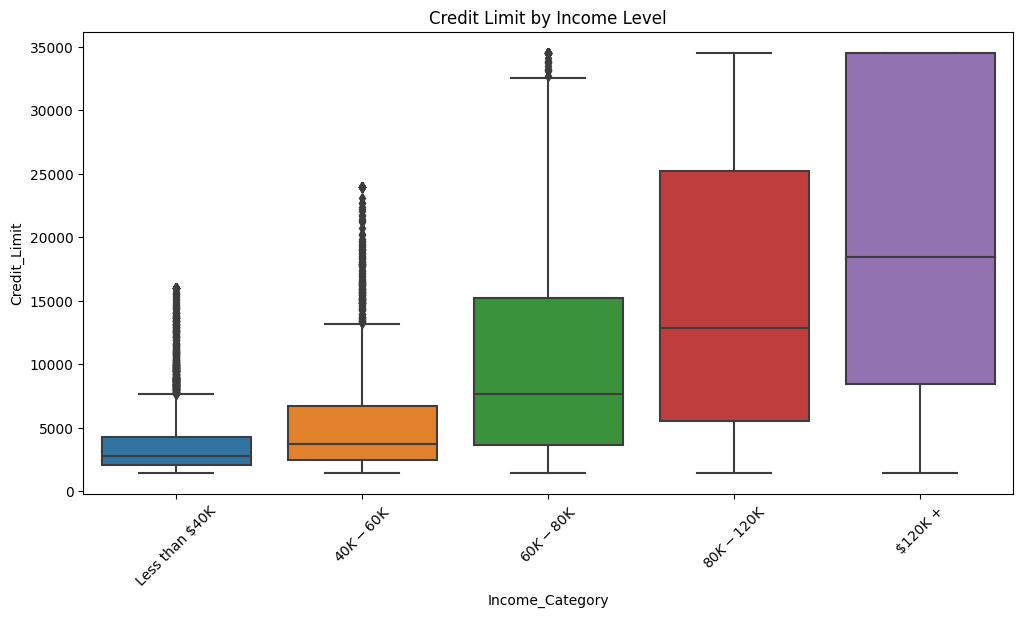

In [19]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Income_Category', y='Credit_Limit', data=data_cleaned, order=['Less than $40K', '$40K - $60K', '$60K - $80K', '$80K - $120K', '$120K +'])
plt.title('Credit Limit by Income Level')
plt.xticks(rotation=45)
plt.show()

### Data Visualisation and Interactive Graphics

In [20]:
import plotly.express as px

# İnteraktif scatter plot
fig = px.scatter(data_cleaned, x='Customer_Age', y='Total_Trans_Amt', color='Attrition_Flag', hover_data=['Credit_Limit'])
fig.update_layout(title='Interactive Scatter Plot - Relationship between Age and Total Expenditure')
fig.show()


### Advanced Analyses and Modelling

This process builds a model to predict customer churn using a Random Forest classifier. It displays the confusion matrix and classification report results to evaluate the performance of the model.

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Preparing the data set
X = data_cleaned.drop('Attrition_Flag', axis=1)
y = data_cleaned['Attrition_Flag']

# One-hot encoding of categorical columns
X = pd.get_dummies(X, drop_first=True)

# Separating data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Building and training a Random Forest classifier model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Model evaluation
y_pred = rf_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[ 200  127]
 [  25 1674]]
                   precision    recall  f1-score   support

Attrited Customer       0.89      0.61      0.72       327
Existing Customer       0.93      0.99      0.96      1699

         accuracy                           0.92      2026
        macro avg       0.91      0.80      0.84      2026
     weighted avg       0.92      0.92      0.92      2026

